In [2]:
import pandas as pd
import numpy as np
import ast
from pathlib import Path
from tqdm import tqdm
import os
import matplotlib.pyplot as plt  

def parse_cluster_pixels(cluster_pixels_str):
    """
    Parses a string in the format '[x, y, E, t][x, y, E, t]...' into a list of coordinates and energy values.
    """
    cluster_pixels = ast.literal_eval(cluster_pixels_str.replace('][', '],['))
    return [(int(x), int(y), float(E)) for x, y, E, t in cluster_pixels]

def normalize_energy(data, E_min, E_max):
    """
    Normalizes energy values within the range [E_min, E_max].
    """
    return [(x, y, (E - E_min) / (E_max - E_min)) for x, y, E in data]

def center_and_scale_coordinates(cluster_data, image_size):
    """
    Centers the cluster coordinates within the image and scales them.
    """
    x_coords = np.array([x for x, _, _ in cluster_data])
    y_coords = np.array([y for _, y, _ in cluster_data])
    
    # Determine shifts for centering
    x_center_shift = (image_size[0] // 2) - int(np.round(x_coords.mean()))
    y_center_shift = (image_size[1] // 2) - int(np.round(y_coords.mean()))
    
    # Apply shifts to the coordinates
    x_centered = x_coords + x_center_shift
    y_centered = y_coords + y_center_shift
    
    # Clamp coordinates to image boundaries
    x_centered = np.clip(x_centered, 0, image_size[0] - 1)
    y_centered = np.clip(y_centered, 0, image_size[1] - 1)

    # Reassemble the new coordinates considering energy
    centered_cluster_data = [(x, y, E) for (x, y, E), x, y in zip(cluster_data, x_centered, y_centered)]
    
    return centered_cluster_data

def create_image(cluster_data, image_size=(256, 256)):
    """
    Creates a 2D image based on coordinates and energy values.
    """
    image = np.zeros(image_size)
    for x, y, E in cluster_data:
        if 0 <= x < image_size[0] and 0 <= y < image_size[1]:
            image[x, y] = E
    return image

def process_file(input_file, output_dir, E_min, E_max, image_size=(256, 256), max_rows=None):
    """
    Processes a file containing clusters and saves images.
    """
    # Create directory for saving images
    os.makedirs(output_dir, exist_ok=True)

    # Read the file
    df = pd.read_csv(input_file, sep='\t')

    # If a row limit is specified
    if max_rows is not None:
        df = df.head(max_rows)

    # Extract and process 'ClusterPixels'
    for index, row in tqdm(df.iterrows(), total=len(df)):
        cluster_pixels_str = row['ClusterPixels']
        cluster_data = parse_cluster_pixels(cluster_pixels_str)

        # Normalize energy
        cluster_data = normalize_energy(cluster_data, E_min, E_max)

        # Center and scale coordinates
        cluster_data = center_and_scale_coordinates(cluster_data, image_size)

        # Create the image
        image = create_image(cluster_data, image_size=image_size)

        # Save the image
        output_path = Path(output_dir) / f"image_{index}.npy"
        np.save(output_path, image)

def compute_global_energy_range(files):
    E_min = float('inf')
    E_max = float('-inf')
    for file in files:
        df = pd.read_csv(file, sep='\t')
        for _, row in df.iterrows():
            cluster_pixels_str = row['ClusterPixels']
            cluster_data = parse_cluster_pixels(cluster_pixels_str)
            energies = [E for _, _, E in cluster_data]
            E_min = min(E_min, min(energies))
            E_max = max(E_max, max(energies))
    return E_min, E_max

def visualize_image(image_path):
    """
    Visualizes an image saved in .npy format.
    """
    image = np.load(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='viridis')
    plt.colorbar(label='Normalized Energy')
    plt.title("Cluster Image")
    plt.show()

# Parameters
experiment_file = "Am_TPX3_vacuum_prelim_E_5p49MeV.clist"
simulation_file = "80V_TPX3_alpha_particle_simulation_in_vacuum.clist"
simulation_file_new = "Simulation_TPX3_500um_Si_vacuum_Am.clist"
output_dir_experiment = "processed_experiment_images_12"
output_dir_simulation = "processed_simulation_images_12"
output_dir_simulation_new = "processed_simulation_images_new_12"
image_size = (12, 12)  
max_rows_experiment = 2500  

# Compute global energy range
E_min, E_max = compute_global_energy_range([experiment_file])
# print(E_max, E_min)
E_min, E_max = compute_global_energy_range([simulation_file_new])
# print(E_max, E_min)
# Process data
process_file(experiment_file, output_dir_experiment, E_min, E_max, image_size, max_rows=max_rows_experiment)
process_file(simulation_file, output_dir_simulation, E_min, E_max, image_size)
process_file(simulation_file_new, output_dir_simulation_new, E_min, E_max, image_size)

# Visualize an example
example_image_path = Path(output_dir_simulation_new) / "image_0.npy"
visualize_image(example_image_path)


631.2 1.7
4954.6 3.0


In [18]:
E_min, E_max = compute_global_energy_range([experiment_file, simulation_file, simulation_file_new])
print(f"E_min: {E_min}, E_max: {E_max}")

E_min: 1.7, E_max: 4954.6


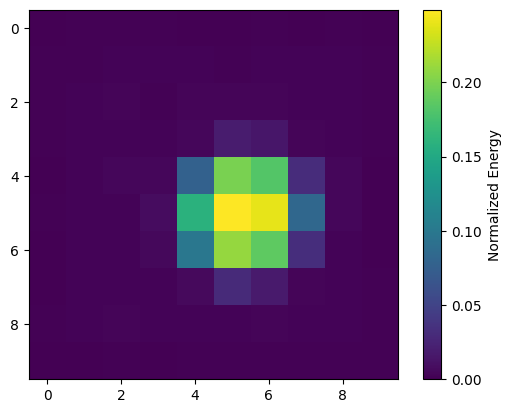

Max value in image: 0.24896265560165978, Min value in image: 0.0


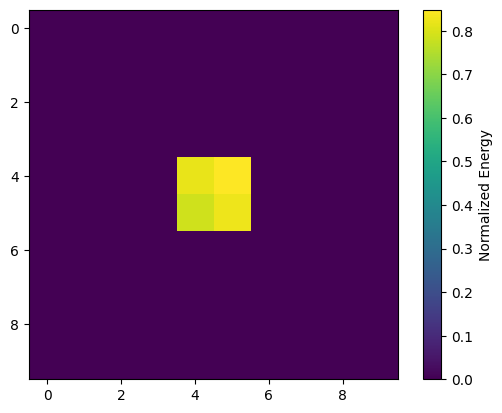

Max value in image: 0.8484575139815984, Min value in image: 0.0


In [10]:
import pandas as pd
import numpy as np
import ast
from pathlib import Path
from tqdm import tqdm
import os
import matplotlib.pyplot as plt  
def visualize_image(image_path):
    """
    Визуализирует изображение, сохраненное в формате .npy.
    """
    image = np.load(image_path)
    #plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='viridis')
    plt.colorbar(label='Normalized Energy')
    #plt.title("Cluster Image")
    plt.show()
# # Визуализация примера
# example_image_path = Path(output_dir_simulation_new) / "image_100.npy"
# visualize_image(example_image_path)
# image = np.load(example_image_path)
# print(f"Max value in image: {image.max()}, Min value in image: {image.min()}")
# Визуализация примера
output_dir_experiment = "processed_experiment_images_10"
output_dir_simulation = "processed_simulation_images_10"
example_image_path = Path(output_dir_experiment) / "image_0.npy"
visualize_image(example_image_path)
image = np.load(example_image_path)
print(f"Max value in image: {image.max()}, Min value in image: {image.min()}")
example_image_path = Path(output_dir_simulation) / "image_100.npy"
visualize_image(example_image_path)
image = np.load(example_image_path)
print(f"Max value in image: {image.max()}, Min value in image: {image.min()}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Модель дискриминатора
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 1, kernel_size=4, stride=1, padding=1)
        )

    def forward(self, x):
        return self.model(x)

# Функция для расчета циклической потери
def cycle_loss(real, reconstructed):
    if real.size() != reconstructed.size():
        reconstructed = F.interpolate(reconstructed, size=real.size()[2:], mode='bilinear', align_corners=False)
    return torch.mean(torch.abs(real - reconstructed))

# Инициализация моделей
gen = Generator().cuda()
disc = Discriminator().cuda()

# Оптимизаторы
gen_optimizer = optim.Adam(gen.parameters(), lr=0.0001, betas=(0.5, 0.999))
disc_optimizer = optim.Adam(disc.parameters(), lr=0.0001, betas=(0.5, 0.999))

checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Списки для хранения значений потерь
gen_losses = []
disc_losses = []

# Обучение
epochs = 101
for epoch in range(epochs):
    for sim_images, exp_images in zip(sim_train_loader, exp_train_dataloader):
        sim_images, exp_images = sim_images.cuda(), exp_images.cuda()

        # Генерация
        fake_exp = gen(sim_images)
        fake_sim = gen(exp_images)

        # Обучение дискриминаторов
        disc_optimizer.zero_grad()
        real_loss_exp = torch.mean((disc(exp_images) - 1) ** 2)
        fake_loss_exp = torch.mean(disc(fake_exp) ** 2)
        disc_loss_exp = (real_loss_exp + fake_loss_exp) / 2

        real_loss_sim = torch.mean((disc(sim_images) - 1) ** 2)
        fake_loss_sim = torch.mean(disc(fake_sim) ** 2)
        disc_loss_sim = (real_loss_sim + fake_loss_sim) / 2

        disc_loss = (disc_loss_exp + disc_loss_sim) / 2
        disc_loss.backward(retain_graph=True)
        disc_optimizer.step()

        # Обучение генераторов
        gen_optimizer.zero_grad()
        gen_loss_exp = torch.mean((disc(fake_exp) - 1) ** 2)
        gen_loss_sim = torch.mean((disc(fake_sim) - 1) ** 2)

        cycle_loss_exp = cycle_loss(exp_images, gen(fake_sim))
        cycle_loss_sim = cycle_loss(sim_images, gen(fake_exp))

        gen_loss = gen_loss_exp + gen_loss_sim + 10 * (cycle_loss_exp + cycle_loss_sim)
        gen_loss.backward()
        gen_optimizer.step()

    # Сохраняем потери
    gen_losses.append(gen_loss.item())
    disc_losses.append(disc_loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Generator Loss: {gen_loss.item()}, Discriminator Loss: {disc_loss.item()}")

    # Сохранение промежуточных результатов каждые 10 эпох
    if epoch % 10 == 0:
        torch.save(gen.state_dict(), f"{checkpoint_dir}/generator_epoch_{epoch}.pth")
        torch.save(disc.state_dict(), f"{checkpoint_dir}/discriminator_epoch_{epoch}.pth")
        print(f"Weights saved for epoch {epoch}")

        # Визуализация результатов
        with torch.no_grad():
            example_sim = sim_images[0:1]
            example_generated = gen(example_sim)[0]
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Simulation Input")
            plt.imshow(example_sim[0].cpu().numpy().squeeze(), cmap="viridis")
            plt.subplot(1, 2, 2)
            plt.title("Generated Experiment")
            plt.imshow(example_generated.cpu().numpy().squeeze(), cmap="viridis")
            plt.show()

# Визуализация графиков потерь
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Discriminator Losses')
plt.show()


In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

def denormalize_energy(energy, E_min=1.7, E_max=4954.6):
    """
    Денормализует значение энергии из диапазона [0, 1] обратно в [E_min, E_max].
    """
    return energy * (E_max - E_min) + E_min

def image_to_cluster(image, E_min=1.7, E_max=4954.6, threshold=0.0001):
    """
    Преобразует двумерное изображение в формат списка координат и значений энергии.
    """
    cluster_data = []
    
    # Проверяем размерность изображения
    if image.ndim == 3:
        intensity_image = image[:, :, 0]  # Если есть каналы, берем первый
    else:
        intensity_image = image  # Если двумерное, используем как есть

    for x in range(intensity_image.shape[0]):
        for y in range(intensity_image.shape[1]):
            energy = intensity_image[x, y]
            if energy > threshold:  # Учитываем только ненулевые пиксели
                denormalized_energy = denormalize_energy(energy, E_min, E_max)
                cluster_data.append((x, y, denormalized_energy, 0))  # Добавляем t = 0
    return cluster_data

def cluster_to_string(cluster_data):
    """
    Преобразует список данных кластера в строку формата [x, y, E, t][x, y, E, t]...
    """
    return ''.join(f'[{x+125}, {y+125}, {E:.1f}, 1]' for x, y, E, t in cluster_data)

# Путь к папке с изображениями
generated_images_folder = r"C:\Users\kamil\Desktop\vyzkumak\data_preparation\test"
output_file = r"C:\Users\kamil\Desktop\vyzkumak\data_preparation\test\test_clusters_2.txt"

with open(output_file, 'w') as f_out:
    # Обрабатываем каждый файл
    for file_name in os.listdir(generated_images_folder):
        if file_name.endswith(".npy"): 
            file_path = os.path.join(generated_images_folder, file_name)

            # Загружаем массив из .npy файла
            image = np.load(file_path)

            # Проверяем, нужно ли нормализовать изображение
            if image.max() > 1:  
                image = image / 255.0 

            # Преобразуем изображение в формат данных
            cluster_data = image_to_cluster(image)

            # Преобразуем данные кластера в строку
            cluster_string = cluster_to_string(cluster_data)

            # Записываем строку в файл
            f_out.write(cluster_string + '\n')

print(f"Итоговый файл сохранён: {output_file}")

Итоговый файл сохранён: C:\Users\kamil\Desktop\vyzkumak\data_preparation\test\test_clusters_2.txt
